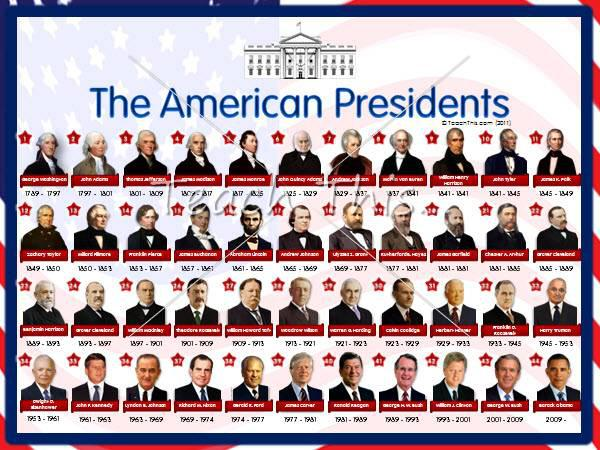

# Part A

### Data Preprocessing

In [104]:
import pandas as pd
import os

In [105]:
text = []
label = []
path = r"/Users/gaoxin/Downloads/presidents-speeches"
president_names = os.listdir(path)

for president in president_names:
    speeches = os.listdir(path + "/" + president + "/speeches")
    num_speeches = len(speeches)
    i=1
    for speech in speeches:
        f = open(path + "/" +president + "/speeches/" + speech, "r")
        content = f.read()
        text.append(content)
        label.append(president)
def delete(s):
    return s[2:]
text=list(map(delete,text))

In [106]:
df=pd.DataFrame()
df['text'] = text
df['label'] = label
df

,text,label
0,Gentlemen of the House of Representatives: W...,George Washington
1,I trust I do not deceive myself when I indulge...,George Washington
2,Fellow Citizens of the Senate and House of Re...,George Washington
3,Whereas combinations to defeat the execution o...,George Washington
4,Fellow Citizens of the Senate and of the Hous...,George Washington
...,...,...
371,"Members of the Cabinet, members of the White H...",Richard M. Nixon
372,"The President: Ladies and gentlemen, before go...",Richard M. Nixon
373,Good evening my fellow Americans:\r\nTen days ...,Richard M. Nixon
374,Good evening:\r\nI want to talk to you tonight...,Richard M. Nixon


In [107]:
from nltk.tokenize import word_tokenize
# remove blank rows, lower case and perform tokenization
df['text'] = [word_tokenize(entry.lower()) for entry in df['text'].dropna()]

In [108]:
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from collections import defaultdict
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
# remove blank rows, lower case and perform tokenization

# defaultdict is a dictionary that provides a default value if the index is not found
# in this example, the dictionary defaults to nouns
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

stopWords = stopwords.words('english')

word_Lemmatized = WordNetLemmatizer()

for index,entry in enumerate(df['text']):
    final_words = []
    
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopWords and word.isalpha():
            final_words.append(word_Lemmatized.lemmatize(word,tag_map[tag[0]]))
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text_final'] = str(final_words)

In [109]:
df.drop(['text'],axis=1,inplace=True)

In [110]:
data=df
data.columns = ['target', 'data']
data

,target,data
0,George Washington,"['gentleman', 'house', 'representative', 'utmo..."
1,George Washington,"['trust', 'deceive', 'indulge', 'persuasion', ..."
2,George Washington,"['fellow', 'citizen', 'senate', 'house', 'repr..."
3,George Washington,"['whereas', 'combination', 'defeat', 'executio..."
4,George Washington,"['fellow', 'citizen', 'senate', 'house', 'repr..."
...,...,...
371,Richard M. Nixon,"['member', 'cabinet', 'member', 'white', 'hous..."
372,Richard M. Nixon,"['president', 'lady', 'gentleman', 'go', 'ques..."
373,Richard M. Nixon,"['good', 'evening', 'fellow', 'american', 'day..."
374,Richard M. Nixon,"['good', 'evening', 'want', 'talk', 'tonight',..."


### Naive Bayes Classifier

In [111]:
from sklearn import model_selection, naive_bayes, svm
train_x, test_x, train_y, test_y = model_selection.train_test_split(data['data'],data['target'],test_size=0.2)

In [112]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_y_encoded = encoder.fit_transform(train_y)
test_y_encoded = encoder.fit_transform(test_y)

TFIDF

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=1000)
tfidf_vect.fit(data['data'])
train_x_tfidf = tfidf_vect.transform(train_x)
test_x_tfidf = tfidf_vect.transform(test_x)

In [156]:
print(tfidf_vect.vocabulary_)

{'house': 429, 'representative': 755, 'attention': 75, 'consider': 182, 'resolution': 760, 'lay': 497, 'minister': 566, 'united': 942, 'state': 857, 'negotiate': 591, 'treaty': 929, 'great': 400, 'together': 917, 'say': 791, 'exist': 323, 'negotiation': 592, 'may': 548, 'render': 751, 'upon': 944, 'subject': 874, 'lose': 532, 'principle': 680, 'discussion': 252, 'avoid': 79, 'extend': 329, 'view': 953, 'consequence': 181, 'must': 580, 'trust': 933, 'part': 629, 'conduct': 175, 'ever': 311, 'information': 458, 'constitution': 184, 'president': 675, 'duty': 266, 'give': 391, 'could': 193, 'require': 758, 'either': 278, 'congress': 180, 'right': 775, 'truth': 934, 'continue': 187, 'honor': 426, 'government': 397, 'branch': 107, 'far': 340, 'people': 642, 'sense': 808, 'obligation': 606, 'impose': 443, 'preserve': 674, 'protect': 701, 'defend': 222, 'permit': 647, 'nature': 585, 'foreign': 367, 'success': 877, 'often': 613, 'depend': 233, 'even': 309, 'bring': 111, 'full': 380, 'measure': 

In [152]:
from sklearn.metrics import accuracy_score
# fit the training dataset on the NB classifier
naive = naive_bayes.MultinomialNB()
naive.fit(train_x_tfidf,train_y)
# predict the labels on validation dataset
predictions_NB = naive.predict(test_x_tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score: ",accuracy_score(predictions_NB, test_y)*100)

Naive Bayes Accuracy Score:  59.210526315789465


In [119]:
sentence_to_classify = "We are all joined together as one American family"
naive.predict(tfidf_vect.transform([sentence_to_classify]))

array(['Ronald Reagan'], dtype='<U21')

### LinearSVC classification

In [155]:
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

cf=svm.LinearSVC(C=1.0,class_weight=None,dual=True,
                fit_intercept=True,intercept_scaling=1,
                loss='squared_hinge',max_iter=1000,
                multi_class='ovr',penalty='l2',
                random_state=None,tol=0.0001,verbose=0)
cf.fit(train_x_tfidf,train_y_encoded)
prediction = cf.predict(test_x_tfidf)
print("LinearSVC Accuracy Score: ",accuracy_score(test_y_encoded, prediction)*100)

LinearSVC Accuracy Score:  82.89473684210526


In [143]:
print(classification_report(test_y_encoded,prediction))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.83      1.00      0.91        10
           2       0.80      0.57      0.67         7
           3       0.83      1.00      0.91         5
           4       0.94      1.00      0.97        16
           5       1.00      0.60      0.75         5
           6       1.00      0.78      0.88         9
           7       0.50      0.50      0.50         4
           8       1.00      1.00      1.00         2
           9       0.70      0.88      0.78         8
          10       1.00      0.60      0.75         5

   micro avg       0.83      0.83      0.83        76
   macro avg       0.83      0.79      0.80        76
weighted avg       0.85      0.83      0.83        76



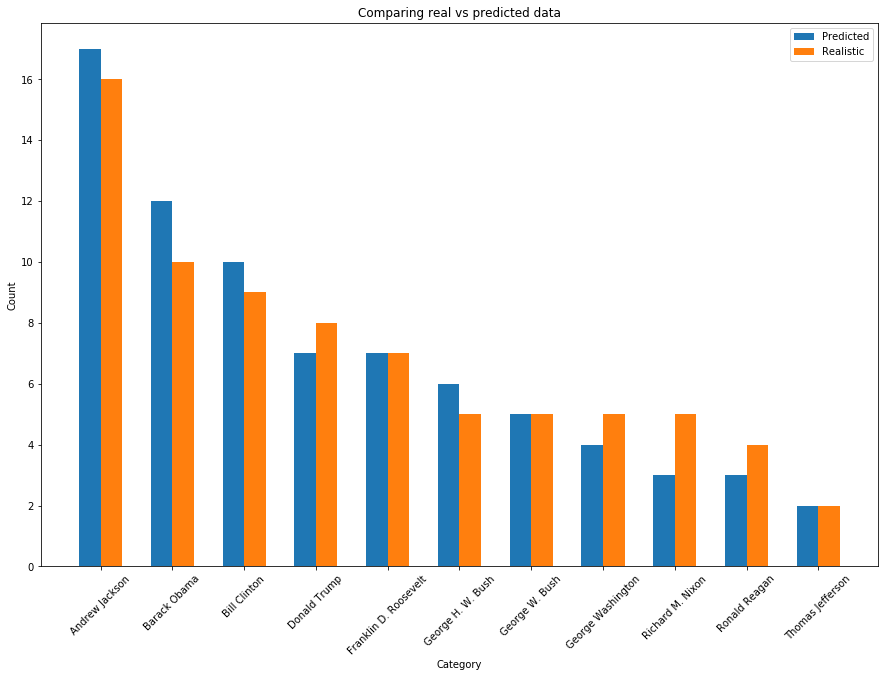

In [147]:
import numpy as np
import matplotlib.pyplot as plt
prediction1 = pd.DataFrame(prediction)
real1 = pd.DataFrame(test_y_encoded)
categories = ['Andrew Jackson', 'Barack Obama','Bill Clinton', 'Donald Trump','Franklin D. Roosevelt', 'George H. W. Bush',
              'George W. Bush', 'George Washington','Richard M. Nixon','Ronald Reagan','Thomas Jefferson']
jj = {"Predicted":prediction1[0].tolist(),"Realistic":real1[0]}
df = pd.DataFrame(jj)

index = np.arange(len(categories))
bar_width = 0.3

fig, ax = plt.subplots()
predicted = ax.bar(index, df["Predicted"].value_counts(), bar_width,
                label="Predicted")

realistic = ax.bar(index+bar_width, df["Realistic"].value_counts(),
                 bar_width, label="Realistic")

fig.set_size_inches(15,10,forward=True)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Comparing real vs predicted data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()
plt.xticks(rotation=45)
plt.show()

### KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier
clf_ = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf_.fit(train_x_tfidf,train_y_encoded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')

In [130]:
prediction = clf_.predict(test_x_tfidf)
print("KNeighborsClassifier Accuracy Score: ",accuracy_score(test_y_encoded, prediction)*100)

KNeighborsClassifier Accuracy Score:  67.10526315789474


In [131]:
_prediction = pd.DataFrame(prediction)
_real = pd.DataFrame(test_y_encoded)

In [132]:
categories = ['Andrew Jackson', 'Barack Obama','Bill Clinton', 'Donald Trump','Franklin D. Roosevelt', 'George H. W. Bush',
              'George W. Bush', 'George Washington','Richard M. Nixon','Ronald Reagan','Thomas Jefferson']

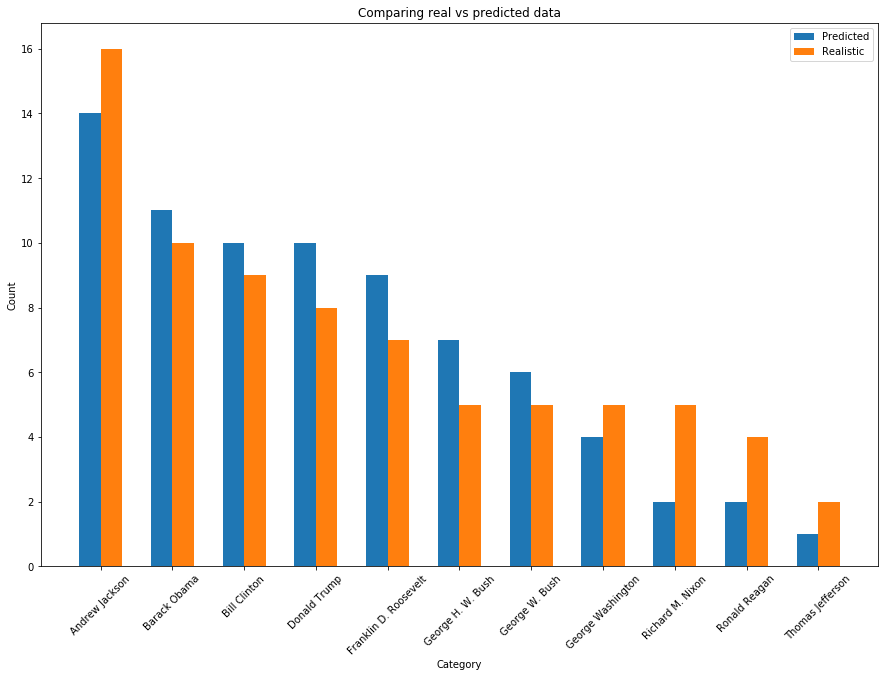

In [149]:
jj = {"Predicted":_prediction[0].tolist(),"Realistic":_real[0]}
df = pd.DataFrame(jj)

index = np.arange(len(categories))
bar_width = 0.3

fig, ax = plt.subplots()
predicted = ax.bar(index, df["Predicted"].value_counts(), bar_width,
                label="Predicted")

realistic = ax.bar(index+bar_width, df["Realistic"].value_counts(),
                 bar_width, label="Realistic")

fig.set_size_inches(15,10,forward=True)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Comparing real vs predicted data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()
plt.xticks(rotation=45)
plt.show()